In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.


['tmdb_5000_credits.csv', 'tmdb_5000_credits.csv.zip', 'tmdb_5000_movies.csv', 'tmdb_5000_movies.csv.zip']


In [2]:
old_data = pd.read_csv('./tmdb_5000_movies.csv')

In [ ]:
#Data clean

In [3]:
old_data['release_date'] = pd.to_datetime(old_data['release_date']).apply(lambda x: x.date())
old_data['title_year'] = pd.to_datetime(old_data['release_date']).apply(lambda x: x.year)
old_data['title_year']=old_data['title_year'].values.astype(int)

In [4]:
data=old_data.copy()

In [5]:
genres_list = []
for i in range(0,4802):
    if old_data.genres[i][8:10] == '10':
        first_type_of_film = old_data.genres[i][8:13]
    elif old_data.genres[i][8:10] == '87':
        first_type_of_film = old_data.genres[i][8:11]
    else:
        first_type_of_film = old_data.genres[i][8:10]
    genres_list.append(first_type_of_film)
df=pd.DataFrame(genres_list)
data['genres_no'] = df
data['genres_no'].replace('','13',inplace=True)
data['genres_no'].dropna(inplace=True)
data['genres_no'].unique()

array(['28', '12', '14', '16', '878', '18', '53', '10751', '35', '36',
       '10752', '37', '10749', '80', '96', '27', '99', '10402', '10770',
       '13', '10769'], dtype=object)

In [6]:
genres_name = []
for i in range(0,4802):
    if len(data['genres_no'][i]) == 3:
        type_name_of_film = data.genres[i][22:26]
    elif len(data['genres_no'][i]) == 5:
        type_name_of_film = data.genres[i][24:27]
    else:
        type_name_of_film = data.genres[i][21:24]
    genres_name.append(type_name_of_film)
df1=pd.DataFrame(genres_name)
data['genres_name'] = df1
data['genres_name'].replace('','others',inplace=True)
data['genres_name'].dropna(inplace=True)
data['genres_name'].value_counts()

Dra       1207
Com       1042
Act        754
Adv        339
Hor        300
Cri        195
Thr        194
Ani        123
Fan        117
Rom        106
Scie        96
Doc         88
Fam         56
 "M         41
Mus         34
others      28
Wes         27
His         25
War         24
TV           4
For          2
Name: genres_name, dtype: int64

In [23]:
production_countries_list = []
for i in range(0,4802):
    production_countries_name = old_data.production_countries[i][17:19]
    production_countries_list.append(production_countries_name)
df2=pd.DataFrame(production_countries_list)
data['production_countries_name'] = df2
data['production_countries_name'].replace('','others',inplace=True)
data['production_countries_name'].dropna(inplace=True)
data['production_countries_name'].unique()

array(['US', 'GB', 'JM', 'CZ', 'NZ', 'CN', 'CA', 'DE', 'JP', 'FR', 'AU',
       'IT', 'ES', 'IN', 'BE', 'others', 'HK', 'NO', 'IE', 'ZA', 'MX',
       'MY', 'FI', 'IS', 'DK', 'PH', 'RU', 'BG', 'CH', 'AE', 'MT', 'KR',
       'BR', 'PE', 'NL', 'BA', 'LU', 'RO', 'SG', 'AW', 'LY', 'HU', 'AR',
       'PA', 'AT', 'GR', 'SE', 'TH', 'FJ', 'BS', 'TR', 'CY', 'BO', 'MA',
       'EC', 'PL', 'IL', 'BT', 'LB', 'KG', 'DZ', 'ID', 'GY', 'PK', 'GP',
       'IR', 'SI', 'AF', 'DO', 'CM', 'KE'], dtype=object)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 29 columns):
budget                       4803 non-null int64
genres                       4803 non-null object
homepage                     1712 non-null object
id                           4803 non-null int64
keywords                     4803 non-null object
original_language            4803 non-null object
original_title               4803 non-null object
overview                     4800 non-null object
popularity                   4803 non-null float64
production_companies         4803 non-null object
production_countries         4803 non-null object
release_date                 4802 non-null object
revenue                      4803 non-null int64
runtime                      4801 non-null float64
spoken_languages             4803 non-null object
status                       4803 non-null object
tagline                      3959 non-null object
title                        4803 non-null o

In [ ]:
# production countries

In [26]:
count_df=pd.DataFrame(data['production_countries_name'].value_counts())
count_df.columns=['Total Amount of production countries']
sorted_count=count_df.sort_values('Total Amount of production countries',ascending=False)
sorted_count.head()

,Total Amount of production countries
US,3101
GB,374
CA,220
DE,200
others,174


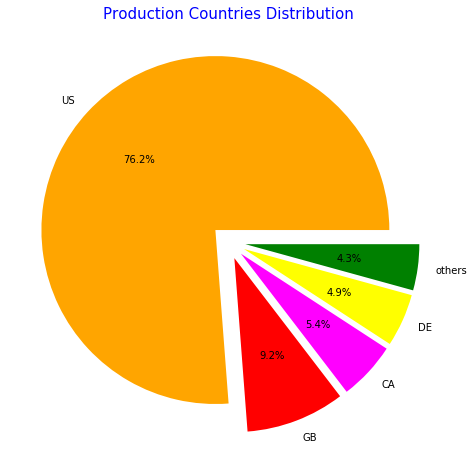

In [38]:
labels = data['production_countries_name'].value_counts().head().index
colors = ['orange','red','magenta','yellow','green']
explode = [0.1,0.1,0.1,0.1,0.1]
sizes = data['production_countries_name'].value_counts().head().values

plt.figure(figsize = (8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Production Countries Distribution',color = 'blue',fontsize = 15)
plt.show()

In [ ]:
#Spoken Language

In [8]:
spoken_languages_list = []
for i in range(0,4802):
    spoken_languages_str = old_data.spoken_languages[i][16:18]
    spoken_languages_list.append(spoken_languages_str)
df3=pd.DataFrame(spoken_languages_list)
data['spoken_languages_str'] = df3
data['spoken_languages_str'].dropna(inplace=True)
data['spoken_languages_str'].replace('','others',inplace=True)
data['spoken_languages_str'].unique()

array(['en', 'fr', 'is', 'ro', 'la', 'it', 'de', 'es', 'pt', 'zh', 'gd',
       'ar', 'af', 'cn', 'da', 'ru', 'sw', 'others', 'bg', 'el', 'cs',
       'ja', 'bo', 'eo', 'he', 'uk', 'sv', 'co', 'et', 'hi', 'ko', 'th',
       'ml', 'vi', 'km', 'hu', 'kw', 'hr', 'nl', 'ta', 'hy', 'sq', 'xx',
       'gl', 'bs', 'no', 'bn', 'ga', 'pl', 'sr', 'yi', 'dz', 'sh', 'ky',
       'id', 'ur', 'fa'], dtype=object)

In [30]:
count_df=pd.DataFrame(data['spoken_languages_str'].value_counts())
count_df.columns=['Total Amount of spoken language']
sorted_count=count_df.sort_values('Total Amount of spoken language',ascending=False)
sorted_count.head()

,Total Amount of spoken language
en,4101
fr,108
,86
es,84
de,61


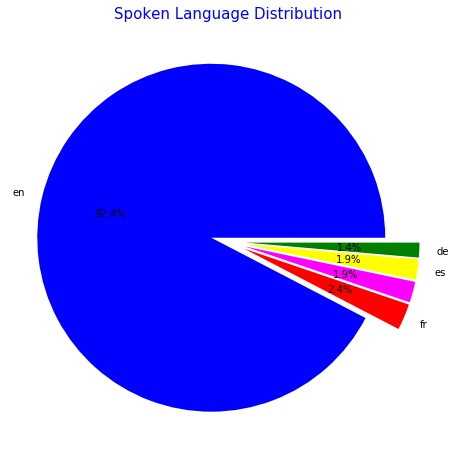

In [39]:
labels = data['spoken_languages_str'].value_counts().head().index
colors = ['blue','red','magenta','yellow','green']
explode = [0.1,0.1,0.1,0.1,0.1]
sizes = data['spoken_languages_str'].value_counts().head().values

plt.figure(figsize = (8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Spoken Language Distribution',color = 'blue',fontsize = 15)
plt.show()

In [ ]:
#Profit

In [32]:
data['profit']=data['revenue']-data['budget']

In [33]:
data['runtime'].dropna(inplace=True)

In [34]:
data['runtime_rate']=data['runtime']/data['runtime'].max()
data['vote_average_rate']=data['vote_average']/data['vote_average'].max()

In [35]:
data['profit_rate']=data['profit']/data['budget']
data['profit_rate'].dropna(inplace=True)
data['profit_rate'].replace('',0.1,inplace=True)

In [36]:
data['vote_average'].describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

In [14]:
missing_data = data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_data['filling_factor'] = (data.shape[0] 
                                - missing_data['missing_count']) / data.shape[0] * 100
missing_data.sort_values('filling_factor').reset_index(drop = True)

,column_name,missing_count,filling_factor
0,homepage,3091,35.644389
1,profit_rate,890,81.469915
2,tagline,844,82.427649
3,overview,3,99.937539
4,runtime_rate,2,99.958359
5,runtime,2,99.958359
6,spoken_languages_str,1,99.979180
7,production_countries_name,1,99.979180
8,genres_name,1,99.979180
9,genres_no,1,99.979180


In [ ]:
#Genres

In [16]:
count_df=pd.DataFrame(data['genres_name'].value_counts())
count_df.columns=['Total Amount of Genres Type']
sorted_count=count_df.sort_values('Total Amount of Genres Type',ascending=False)
sorted_count.head()

,Total Amount of Genres Type
Dra,1207
Com,1042
Act,754
Adv,339
Hor,300


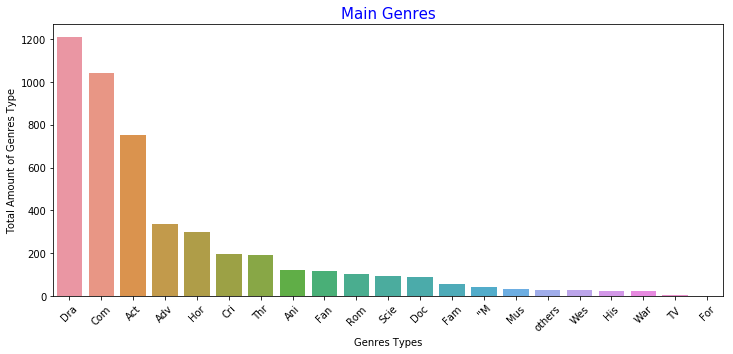

In [17]:
f, ax= plt.subplots(figsize=(12,5))
sns.barplot(x=sorted_count.index,y=sorted_count['Total Amount of Genres Type'])
plt.title("Main Genres",color = 'blue',fontsize=15)
plt.xlabel('Genres Types')
plt.xticks(rotation=45)
plt.show()

In [18]:
category_financial = data[['budget','revenue','profit']].groupby(data['genres_name'])
financial_df=pd.DataFrame(category_financial.sum())
sorted_profit=financial_df.sort_values('profit',ascending=False)
sorted_profit.head()

,budget,revenue,profit
genres_name,,,
Act,35929102395,91883487959,55954385564
Adv,22237831737,71515822443,49277990706
Com,19628200652,53955533023,34327332371
Dra,21701139933,54752658561,33051518628
Ani,8315032353,29737170127,21422137774


In [52]:
#https://www.kaggle.com/fabiendaniel/film-recommendation-engine/data
#Key Words

In [53]:
import json
import pandas as pd
#___________________________
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries',
                    'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df
#___________________________
def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df
#___________________
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews']
#____________________________________
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users'}
#_____________________________________________________
IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}
#_____________________________________________________
def safe_access(container, index_values):
    # return missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan
#_____________________________________________________
def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])
#_____________________________________________________
def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])
#_____________________________________________________
def convert_to_original_format(movies, credits):
    tmdb_movies = movies.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)
    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [3, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipe_flatten_names)
    return tmdb_movies

In [66]:
!pip install wordcloud 

In [67]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math, nltk, warnings
from nltk.corpus import wordnet
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import fuzz
from wordcloud import WordCloud, STOPWORDS
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings('ignore')
PS = nltk.stem.PorterStemmer()
#__________________
credits = load_tmdb_credits("./tmdb_5000_credits.csv")
movies = load_tmdb_movies("./tmdb_5000_movies.csv")
df_initial = convert_to_original_format(movies, credits)
print('Shape:',df_initial.shape)
#__________________________________________
# info on variable types and filling factor
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
tab_info

Shape: (4803, 26)


,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,production_countries,release_date,gross,duration,spoken_languages,status,tagline,movie_title,vote_average,num_voted_users,title_year,country,director_name,actor_1_name,actor_2_name,actor_3_name
column type,int64,object,object,int64,object,object,object,object,float64,object,object,object,int64,float64,object,object,object,object,float64,int64,float64,object,object,object,object,object
null values,0,0,3091,0,0,86,0,3,0,0,0,1,0,2,0,0,844,0,0,0,1,174,30,53,63,93
null values (%),0,0,64.3556,0,0,1.79055,0,0.062461,0,0,0,0.0208203,0,0.0416406,0,0,17.5724,0,0,0,0.0208203,3.62274,0.62461,1.10348,1.31168,1.93629


In [68]:
set_keywords = set()
for liste_keywords in df_initial['plot_keywords'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)
#_________________________
# remove null chain entry
set_keywords.remove('')

In [69]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [70]:
keyword_occurences, dum = count_word(df_initial, 'plot_keywords', set_keywords)
keyword_occurences[:5]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 189]]

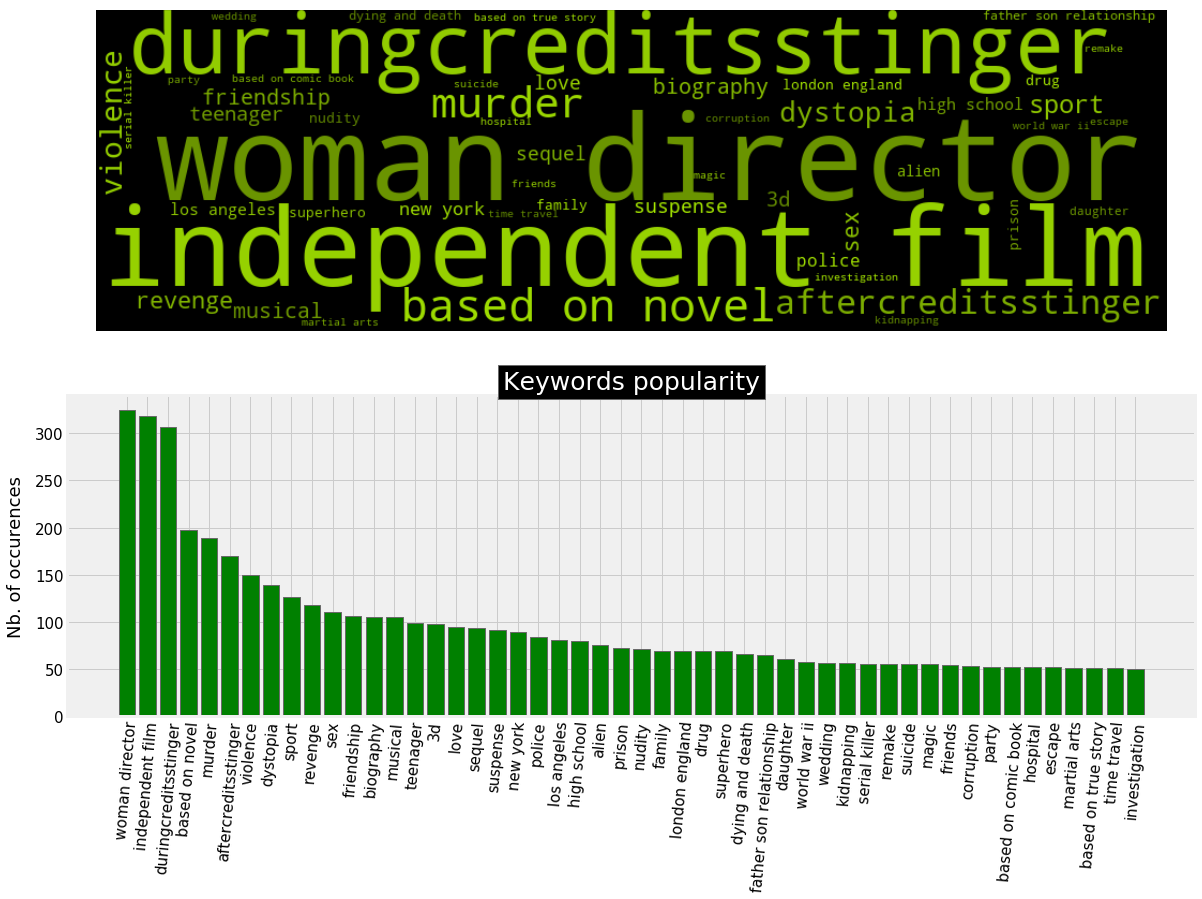

In [71]:
#_____________________________________________
# Function that control the color of the words
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# WARNING: the scope of variables is used to get the value of the "tone" variable
# I could not find the way to pass it as a parameter of "random_color_func()"
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#_____________________________________________
# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
#_______________________________________________________
# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')
#_____________________________________________
# LOWER PANEL: HISTOGRAMS
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x_axis, y_axis, align = 'center', color='g')
#_______________________
plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

In [ ]:
#Decade -- title year

In [72]:
df_initial['decade'] = df_initial['title_year'].apply(lambda x:((x-1900)//10)*10)
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(gr):
    return {'min':gr.min(),'max':gr.max(),'count': gr.count(),'mean':gr.mean()}
#______________________________________________________________
# Creation of a dataframe with statitical infos on each decade:
test = df_initial['title_year'].groupby(df_initial['decade']).apply(get_stats).unstack()

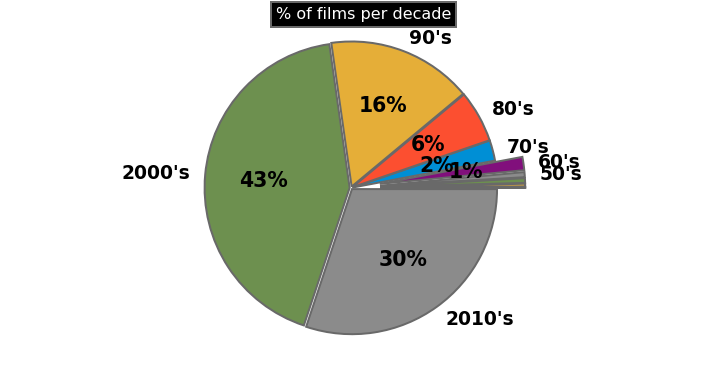

In [73]:
sns.set_context("poster", font_scale=0.85)
#_______________________________
# funtion used to set the labels
def label(s):
    val = (1900 + s, s)[s < 100]
    chaine = '' if s < 50 else "{}'s".format(int(val))
    return chaine
#____________________________________
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
labels = [label(s) for s in  test.index]
sizes  = test['count'].values
explode = [0.2 if sizes[i] < 100 else 0.01 for i in range(11)]
ax.pie(sizes, explode = explode, labels=labels,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
ax.set_title('% of films per decade',
             bbox={'facecolor':'k', 'pad':5},color='w', fontsize=16);
df_initial.drop('decade', axis=1, inplace = True)


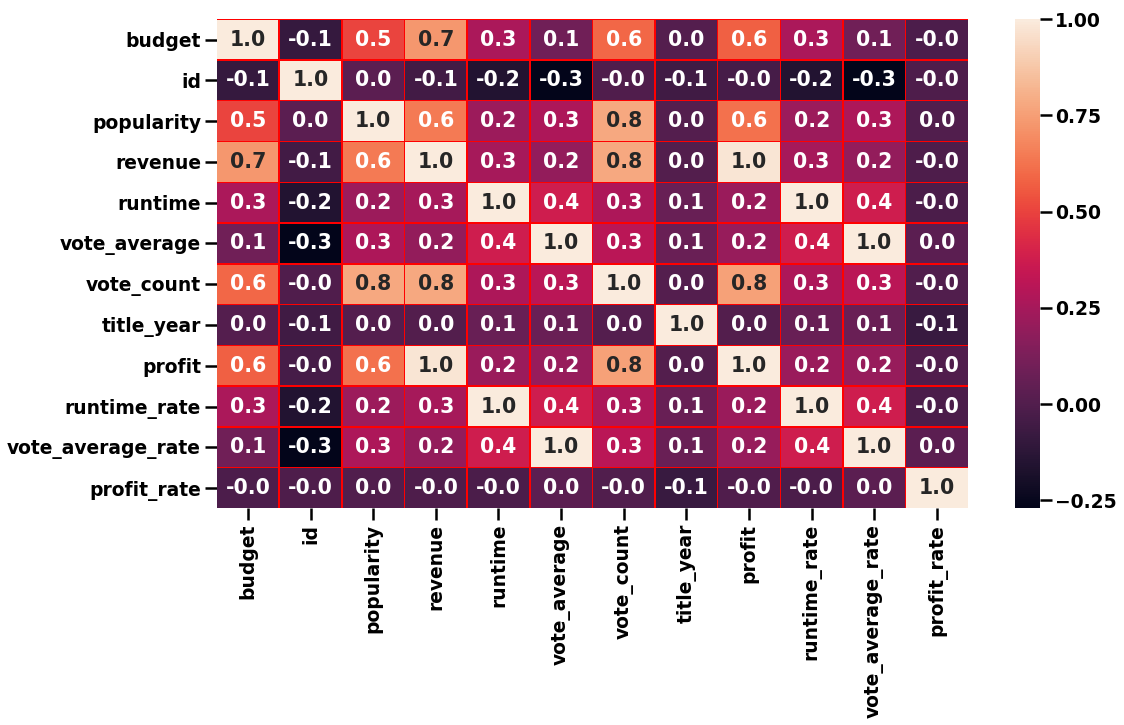

In [74]:
f,ax = plt.subplots(figsize=(15, 9))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

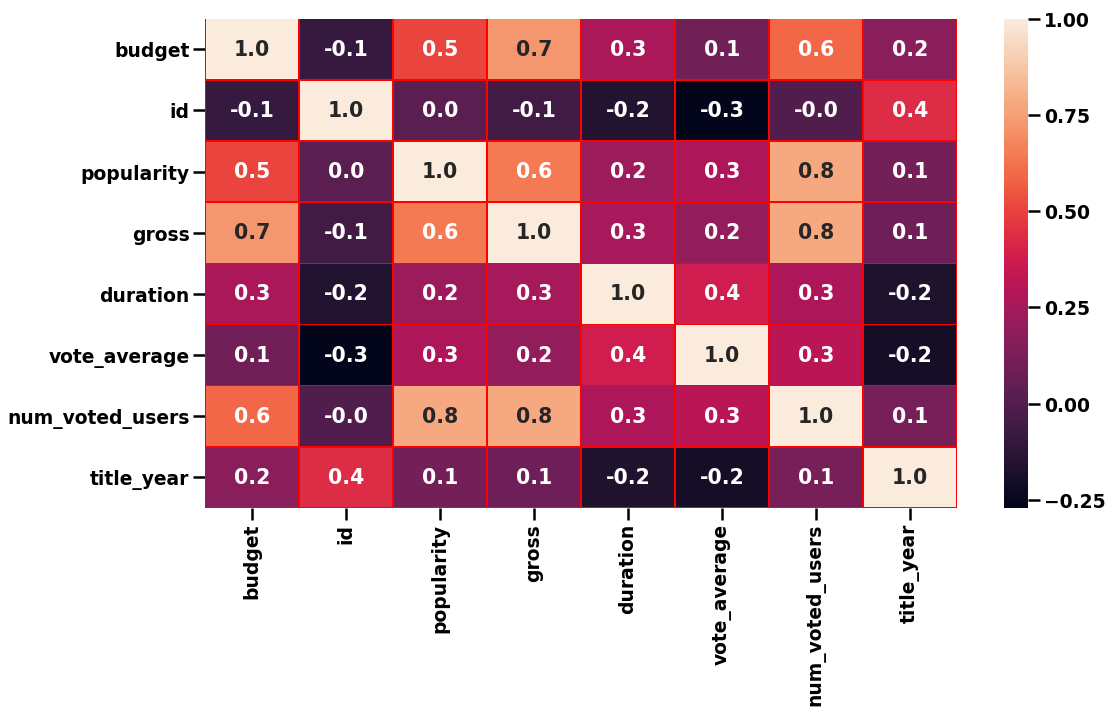

In [75]:
f,ax = plt.subplots(figsize=(15, 9))
sns.heatmap(df_initial.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()